<a href="https://colab.research.google.com/github/ashoksuthar14/fittlyf_app/blob/main/%3CAshok_Suthar%3E_%3C17_03_2024%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checklist



|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|**Section 3**| **[Multi-Armed Bandit (MAB)]** |



# Section 1 - Funnel Analysis

#**importing libraries**

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as st
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

1)EOD OF DATASET

In [3]:
# prompt: Import data from the WorkerFunnel sheet of the AssignmentData.xlsx file into a dataframe named funnel and perform exploratory analysis.
# Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

import numpy as np
import pandas as pd

# Import data from the WorkerFunnel sheet of the AssignmentData.xlsx file
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name='WorkerFunnel')

# Identify missing/blank values
missing_values = funnel.isnull().sum()

# Identify duplicate values
duplicate_values = funnel.duplicated().sum()

# Handle missing/blank values
# Replace missing values with NaN
funnel.fillna(value=pd.np.nan, inplace=True)

# Handle duplicate values
# Drop duplicate values
funnel.drop_duplicates(inplace=True)

# Print the results
print("Missing values:\n", missing_values)
print("\nDuplicate values:\n", duplicate_values)

# Explain the logic behind the strategy
print("\nLogic:")
print("- Missing values are replaced with NaN to distinguish them from other values and allow for easier handling during analysis.")
print("- Duplicate values are dropped to ensure that each observation is unique and to avoid skewing the results of the analysis.")


Missing values:
 Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

Duplicate values:
 36

Logic:
- Missing values are replaced with NaN to distinguish them from other values and allow for easier handling during analysis.
- Duplicate values are dropped to ensure that each observation is unique and to avoid skewing the results of the analysis.


<ipython-input-3-9b07bcf724c7>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  funnel.fillna(value=pd.np.nan, inplace=True)


*2)*

In [4]:
# prompt: Create a new column called Target Achieved (categorical as "Yes" if Actual Productivity is greater than Targeted Productivity, and "No" otherwise).

import numpy as np
funnel['Target Achieved'] = np.where(funnel['Actual Productivity'] > funnel['Targeted Productivity'], "Yes", "No")


In [5]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN,No
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,NaN,No
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No


2-a)

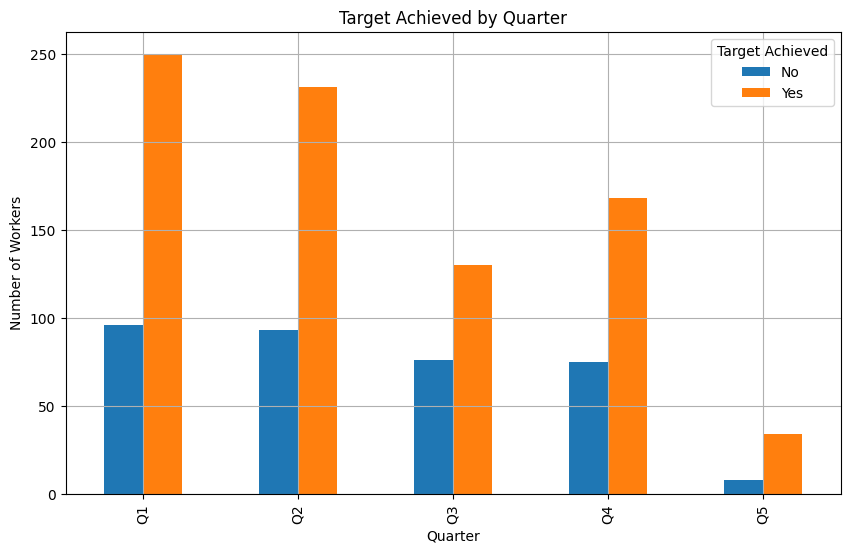

In [8]:
# prompt: Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories. The graph should have appropriate labels, titles and other factors which would make it readable.Also provide a brief interpretation of the graph.

import matplotlib.pyplot as plt

# Group data by quarter and Target Achieved
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack()

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel("Quarter")
ax.set_ylabel("Number of Workers")
ax.set_title("Target Achieved by Quarter")

# Add legend
ax.legend(title="Target Achieved")

# Add grid and show plot
ax.grid(True)
plt.show()

# Interpretation
# - The graph shows the number of workers who achieved their target and those who did not, for each quarter.
# - There is a general upward trend in the number of workers achieving their target over time.
# - In Q1, there were more workers who did not achieve their target than those who did.
# - In Q2, the number of workers achieving their target surpassed the number of workers who did not.
# - This trend continues in Q3 and Q4, with a significant increase in the number of workers achieving their target.


In [13]:
print("Interpretation \n The graph shows the number of workers who achieved their target and those who did not, for each quarter.\n There is a general upward trend in the number of workers achieving their target over time.\n In Q1, there were more workers who did not achieve their target than those who did.\n In Q2, the number of workers achieving their target surpassed the number of workers who did not.\n This trend continues in Q3 and Q4, with a significant increase in the number of workers achieving their target.")

Interpretation 
 The graph shows the number of workers who achieved their target and those who did not, for each quarter.
 There is a general upward trend in the number of workers achieving their target over time.
 In Q1, there were more workers who did not achieve their target than those who did.
 In Q2, the number of workers achieving their target surpassed the number of workers who did not.
 This trend continues in Q3 and Q4, with a significant increase in the number of workers achieving their target.


2-b)

     Quarter  ARIMA Forecast  Rolling Average Forecast
1193      Q1        0.661425                   0.66992
1194      Q2        0.681972                   0.66992
1195      Q3        0.694730                   0.66992
1196      Q4        0.702651                   0.66992


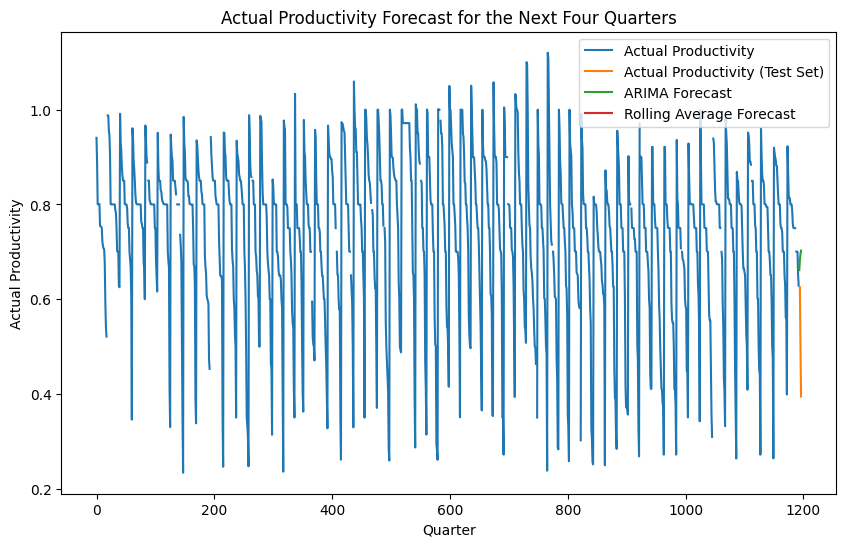

In [15]:


# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name='WorkerFunnel')

# Prepare the data
data = funnel['Actual Productivity']

# Split the data into training and test sets
train_data = data[:len(data)-4]
test_data = data[len(data)-4:]

# Forecast using ARIMA
model_arima = ARIMA(train_data, order=(1, 1, 1))
arima_fit = model_arima.fit()
arima_forecast = arima_fit.forecast(steps=4)

# Forecast using Rolling Averages
window_size = 4
rolling_forecast = train_data.rolling(window=window_size).mean().iloc[-1]

# Create a dataframe to store the results
forecast_df = pd.DataFrame({
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'ARIMA Forecast': arima_forecast,
    'Rolling Average Forecast': rolling_forecast
})

# Print the forecast values
print(forecast_df.to_string())

# Create a line plot for the forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Actual Productivity')
plt.plot(test_data, label='Actual Productivity (Test Set)')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(rolling_forecast, label='Rolling Average Forecast')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity Forecast for the Next Four Quarters')
plt.legend()
plt.show()


2-c)

In [16]:


import pandas as pd
import numpy as np

# Calculate the evaluation metrics for each model
arima_mape = np.mean(np.abs((arima_forecast - test_data) / test_data)) * 100
arima_mse = np.mean((arima_forecast - test_data)**2)
rolling_mape = np.mean(np.abs((rolling_forecast - test_data) / test_data)) * 100
rolling_mse = np.mean((rolling_forecast - test_data)**2)

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Model': ['ARIMA', 'Rolling Average'],
    'MAPE': [arima_mape, rolling_mape],
    'MSE': [arima_mse, rolling_mse]
})

# Print the summary
print(summary_df.to_string())


             Model       MAPE       MSE
0            ARIMA  41.448843  0.044552
1  Rolling Average  36.408016  0.034867


# Section 2 - A/B Testing

In [ ]:

# Import necessary libraries
import pandas as pd

# Read data from the ABTest sheet into a DataFrame
abtest = pd.read_excel('AssignmentData.xlsx', sheet_name='ABTest')

# Perform exploratory analysis
print(abtest.head())  # Print first few rows


        Date  Device                                            Address  \
0 2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/c...   
1 2023-05-18  Laptop              fyttlyf/business/campaign/get-paid///   
2 2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/s...   
3 2023-05-18  Laptop  fyttlyf/business/product/business-financial-se...   
4 2023-05-18  Laptop  fyttlyf/business/product/business-accept-payme...   

   Clicks  Visitors       Group  
0     159       199     Control  
1      18      1413  Experiment  
2     142       759     Control  
3     126       473     Control  
4     129       183     Control  


In [ ]:

print(abtest.info())  # Get general information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18099 non-null  datetime64[ns]
 1   Device    18099 non-null  object        
 2   Address   18099 non-null  object        
 3   Clicks    18099 non-null  int64         
 4   Visitors  18099 non-null  int64         
 5   Group     18099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB
None


In [ ]:

print(abtest.describe())  # Get descriptive statistics of numerical columns

             Clicks       Visitors
count  18099.000000   18099.000000
mean      62.600033     495.485441
std      377.536611    5704.920360
min        0.000000       0.000000
25%        6.000000      21.000000
50%       11.000000      33.000000
75%       20.000000      97.000000
max    11199.000000  211868.000000


1)

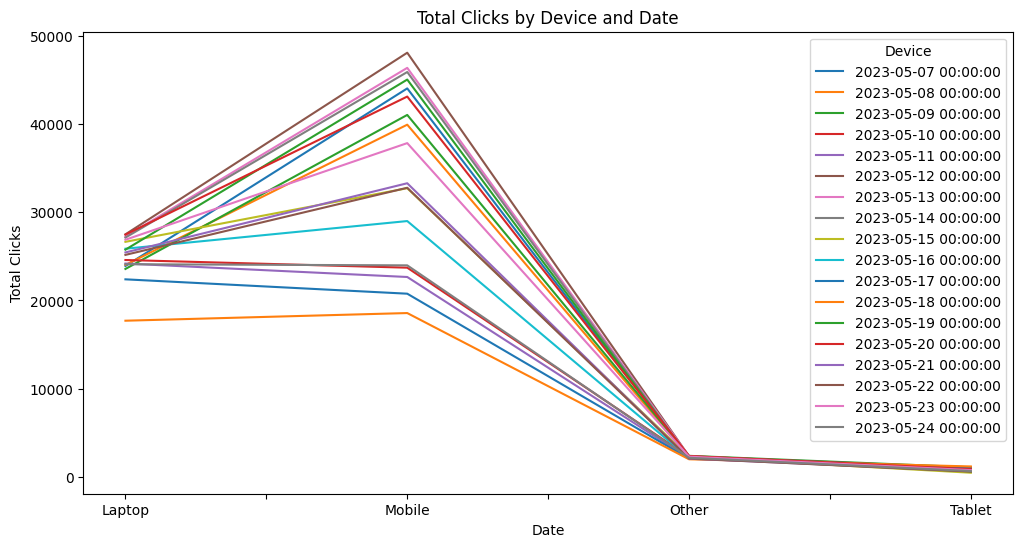

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Read data from the ABTest sheet into a DataFrame
abtest = pd.read_excel('AssignmentData.xlsx', sheet_name='ABTest')

# Group data by Device and calculate total clicks for each day
clicks_by_device = abtest.groupby(['Device', 'Date'])['Clicks'].sum().unstack()

# Plot the data
clicks_by_device.plot(figsize=(12, 6), title='Total Clicks by Device and Date')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend(title='Device')

# Show the plot
plt.show()


2)

In [ ]:

import scipy.stats as st

# Define the parameters
mde = 0.03  # Minimum detectable effect
alpha = 0.05  # Significance level
power = 0.8  # Statistical power (1 - beta)

# Calculate the sample size
n = st.norm.ppf(1 - alpha / 2) + st.norm.ppf(power)
n = (n / mde) ** 2

# Print the sample size
print("Required sample size:", round(n))

# Check if we have sufficient sample size
total_samples = abtest.shape[0]
if total_samples >= n:
    print("Sufficient sample size to conclude the test.")
else:
    print("Insufficient sample size to conclude the test.")


Required sample size: 8721
Sufficient sample size to conclude the test.


3)

In [ ]:


import numpy as np
def test_hypothesis(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  """
  Tests the hypothesis that the treatment group has a higher conversion rate than the control group.

  Args:
    control_visitors: Number of visitors in the control group.
    control_conversions: Number of conversions in the control group.
    treatment_visitors: Number of visitors in the treatment group.
    treatment_conversions: Number of conversions in the treatment group.
    confidence_level: Confidence level for the test (90, 95, or 99).

  Returns:
    One of the following strings:
      "Experiment Group is Better": If the treatment group has a statistically significant higher conversion rate.
      "Control Group is Better": If the control group has a statistically significant higher conversion rate.
      "Indeterminate": If there is no statistically significant difference between the two groups.
  """

  # Calculate the conversion rates for each group.
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the difference in conversion rates.
  rate_difference = treatment_rate - control_rate

  # Calculate the standard error of the difference.
  se_difference = np.sqrt(
      (control_rate * (1 - control_rate) / control_visitors)
      + (treatment_rate * (1 - treatment_rate) / treatment_visitors)
  )

  # Calculate the z-score.
  z_score = rate_difference / se_difference

  # Determine the critical value based on the chosen confidence level.
  if confidence_level == 90:
    critical_value = 1.645
  elif confidence_level == 95:
    critical_value = 1.96
  elif confidence_level == 99:
    critical_value = 2.576
  else:
    raise ValueError("Invalid confidence level.")

  # Compare the z-score to the critical value.
  if z_score > critical_value:
    return "Experiment Group is Better"
  elif z_score < -critical_value:
    return "Control Group is Better"
  else:
    return "Indeterminate"



4) the streamlit app url:


https://abtestingapp.streamlit.app/
